In [4]:
# Importar bibliotecas necesarias
# librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [5]:
# Definir la ruta a la carpeta Data
results_path = '../Data'

# Cargar los datos
file_path = os.path.join(results_path, 'US_Accidents_March23.csv')
df = pd.read_csv(file_path)

# Tomar una muestra aleatoria del 10% de los datos
sample_df = df.sample(frac=0.1, random_state=42)  # random_state asegura reproducibilidad

# Mostrar las primeras filas de la muestra
print("Primeras filas de la muestra (10% del conjunto de datos):")
print(sample_df.head())

Primeras filas de la muestra (10% del conjunto de datos):
                ID   Source  Severity                     Start_Time  \
7133276  A-7182628  Source1         1            2020-04-17 09:29:30   
5363845  A-5404588  Source1         2  2022-04-21 10:01:00.000000000   
155993    A-156000  Source3         3            2016-08-12 16:45:00   
1861414  A-1871277  Source2         3            2019-09-20 15:22:16   
2021359  A-2031222  Source2         2            2019-06-03 16:55:43   

                              End_Time  Start_Lat   Start_Lng    End_Lat  \
7133276            2020-04-17 10:29:30  26.706900  -80.119360  26.706900   
5363845  2022-04-21 11:44:08.000000000  38.781024 -121.265820  38.780377   
155993             2016-08-12 17:15:00  33.985249  -84.269348        NaN   
1861414            2019-09-20 15:56:00  47.118706 -122.556908        NaN   
2021359            2019-06-03 18:12:09  33.451355 -111.890343        NaN   

            End_Lng  Distance(mi)  ... Roundabout St

In [6]:
# Descripción general de las columnas y tipos de datos
print("\nInformación sobre las columnas y tipos de datos en la muestra:")
print(sample_df.info())

# Estadísticas descriptivas de las variables numéricas en la muestra
print("\nEstadísticas descriptivas de las variables numéricas en la muestra:")
print(sample_df.describe())

# Verificación de valores nulos en la muestra
print("\nConteo de valores nulos por columna en la muestra:")
print(sample_df.isnull().sum())

# Verificación de duplicados en la muestra
print("\nNúmero de filas duplicadas en la muestra:")
print(sample_df.duplicated().sum())

# Ejemplo de análisis de frecuencia en la variable 'Severity' en la muestra
print("\nDistribución de la variable 'Severity' en la muestra:")
print(sample_df['Severity'].value_counts(normalize=True))



Información sobre las columnas y tipos de datos en la muestra:
<class 'pandas.core.frame.DataFrame'>
Index: 772839 entries, 7133276 to 1155065
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     772839 non-null  object 
 1   Source                 772839 non-null  object 
 2   Severity               772839 non-null  int64  
 3   Start_Time             772839 non-null  object 
 4   End_Time               772839 non-null  object 
 5   Start_Lat              772839 non-null  float64
 6   Start_Lng              772839 non-null  float64
 7   End_Lat                432291 non-null  float64
 8   End_Lng                432291 non-null  float64
 9   Distance(mi)           772839 non-null  float64
 10  Description            772838 non-null  object 
 11  Street                 771751 non-null  object 
 12  City                   772811 non-null  object 
 13  County                 

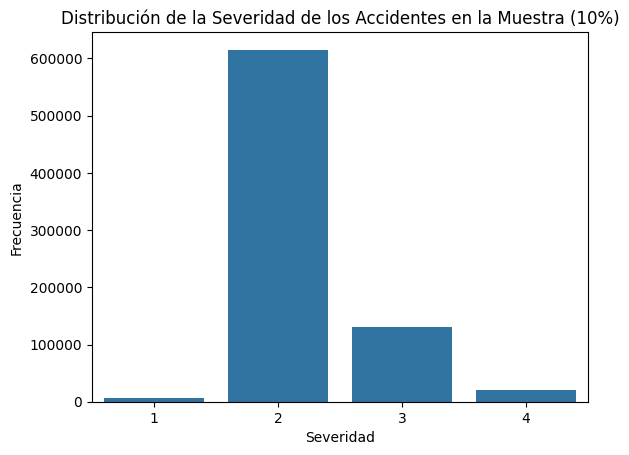

In [7]:
# Definir la ruta a la carpeta Results
results_path = '../Results'

# Asegúrate de que la carpeta Results existe
if not os.path.exists(results_path):
    os.makedirs(results_path)

# 1. Visualización de la distribución de la variable 'Severity' en la muestra
sns.countplot(data=sample_df, x='Severity')
plt.title("Distribución de la Severidad de los Accidentes en la Muestra (10%)")
plt.xlabel("Severidad")
plt.ylabel("Frecuencia")
plt.savefig(os.path.join(results_path, 'Distribucion_Severity.png'))  # Guardar el gráfico
plt.show()


In [12]:
# Aseguramos que las variables de tiempo estén en formato datetime usando 'mixed' para manejar diferentes formatos
sample_df['Start_Time'] = pd.to_datetime(sample_df['Start_Time'], format='mixed')
sample_df['End_Time'] = pd.to_datetime(sample_df['End_Time'], format='mixed')

In [13]:
sample_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7133276,A-7182628,Source1,1,2020-04-17 09:29:30,2020-04-17 10:29:30,26.706900,-80.119360,26.706900,-80.119360,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
5363845,A-5404588,Source1,2,2022-04-21 10:01:00,2022-04-21 11:44:08,38.781024,-121.265820,38.780377,-121.265815,0.045,...,False,False,True,False,False,False,Day,Day,Day,Day
155993,A-156000,Source3,3,2016-08-12 16:45:00,2016-08-12 17:15:00,33.985249,-84.269348,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
1861414,A-1871277,Source2,3,2019-09-20 15:22:16,2019-09-20 15:56:00,47.118706,-122.556908,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
2021359,A-2031222,Source2,2,2019-06-03 16:55:43,2019-06-03 18:12:09,33.451355,-111.890343,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15160\1259617385.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sample_df, x='Day_of_Week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')


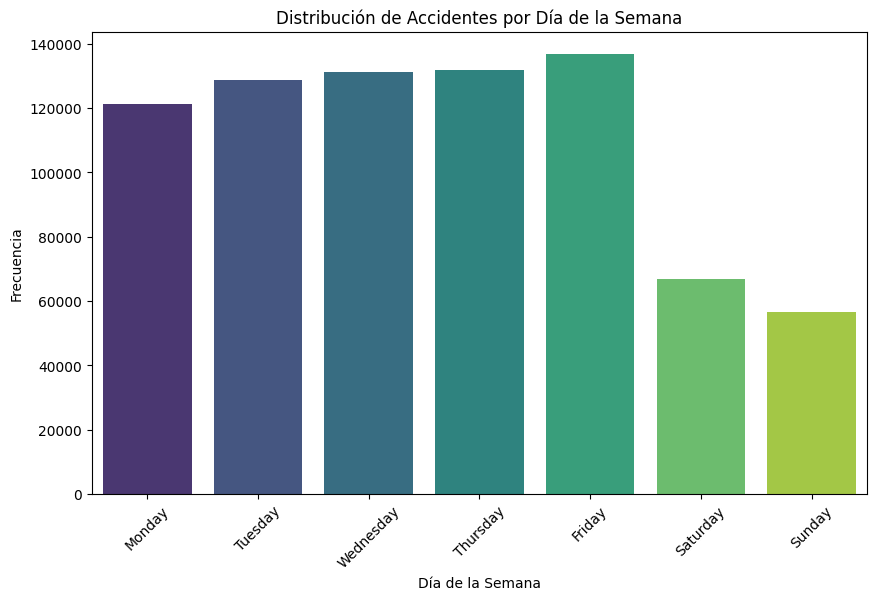

In [14]:
# 2. Distribución de Accidentes por Día de la Semana
plt.figure(figsize=(10, 6))
sample_df['Day_of_Week'] = sample_df['Start_Time'].dt.day_name()  # Extraer el día de la semana
sns.countplot(data=sample_df, x='Day_of_Week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title("Distribución de Accidentes por Día de la Semana")
plt.xlabel("Día de la Semana")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.savefig(os.path.join(results_path, 'Distribucion_accidentes_dia.png'))  # Guardar el gráfico
plt.show()

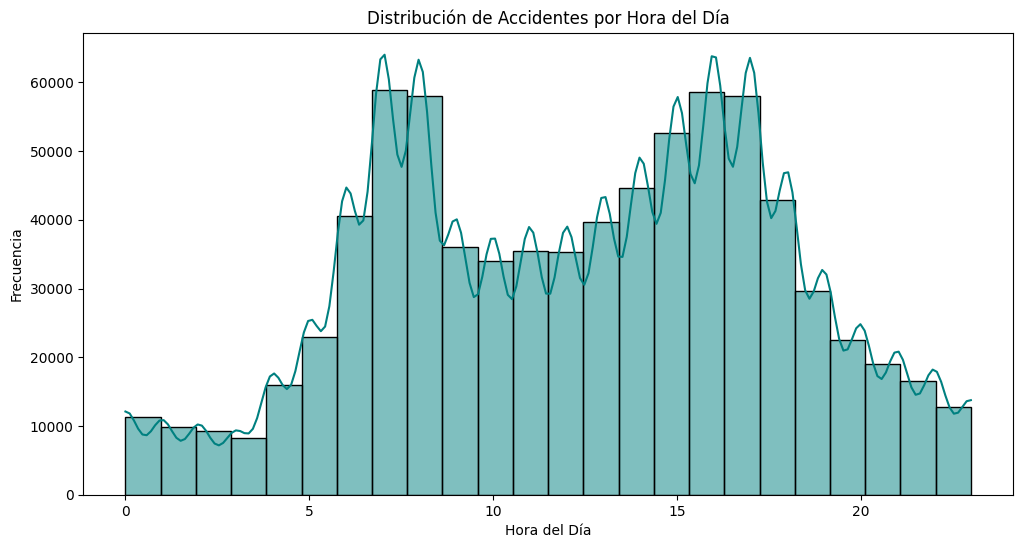

In [15]:
# 3. Distribución de Accidentes por Hora del Día
plt.figure(figsize=(12, 6))
sample_df['Hour_of_Day'] = sample_df['Start_Time'].dt.hour  # Extraer la hora del día
sns.histplot(data=sample_df, x='Hour_of_Day', bins=24, kde=True, color='teal')
plt.title("Distribución de Accidentes por Hora del Día")
plt.xlabel("Hora del Día")
plt.ylabel("Frecuencia")
plt.savefig(os.path.join(results_path, 'Distribucion_accidentes_hora.png'))  # Guardar el gráfico
plt.show()



C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15160\1438661259.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sample_df[sample_df['Weather_Condition'].isin(top_conditions)], y='Weather_Condition', palette='magma')


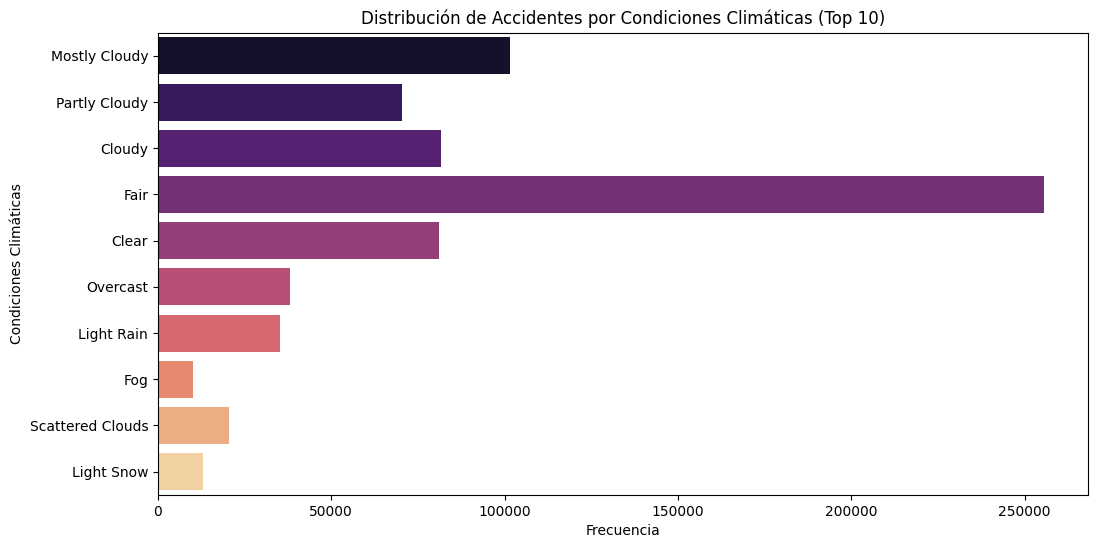

In [16]:
# 4. Distribución de Accidentes según Condiciones Climáticas
plt.figure(figsize=(12, 6))
top_conditions = sample_df['Weather_Condition'].value_counts().nlargest(10).index  # Seleccionar las 10 condiciones más frecuentes
sns.countplot(data=sample_df[sample_df['Weather_Condition'].isin(top_conditions)], y='Weather_Condition', palette='magma')
plt.title("Distribución de Accidentes por Condiciones Climáticas (Top 10)")
plt.xlabel("Frecuencia")
plt.ylabel("Condiciones Climáticas")
plt.savefig(os.path.join(results_path, 'Distribucion_accidentes_clima.png'))  # Guardar el gráfico
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15160\1246346691.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.values, y=state_counts.index, palette='coolwarm')


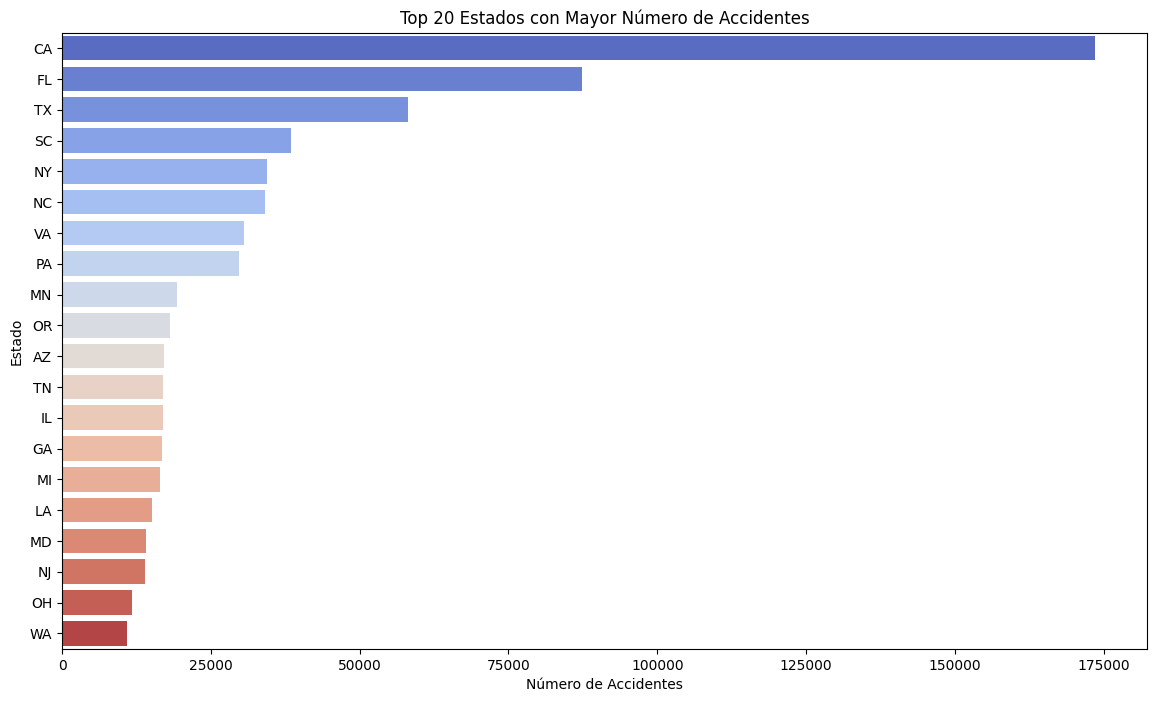

In [18]:
# 6. Distribución Geográfica de Accidentes por Estado
plt.figure(figsize=(14, 8))
state_counts = sample_df['State'].value_counts().nlargest(20)  # Seleccionar los 20 estados con más accidentes
sns.barplot(x=state_counts.values, y=state_counts.index, palette='coolwarm')
plt.title("Top 20 Estados con Mayor Número de Accidentes")
plt.xlabel("Número de Accidentes")
plt.ylabel("Estado")
plt.savefig(os.path.join(results_path, 'Distribucion_accidentes_geograficos.png'))  # Guardar el gráfico
plt.show()